+ 기업이 처한 상황을 인식하고 문제를 정의
+ 빈도분석 중심, RFM이해 활용 , Recency, Freq, Monetary


In [1]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import datetime as dt

# sales_data 변수를 만들고 sales_05.csv 값을 할당
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_05_8.csv')

# sales_data의 head 값 확인하기
sales_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager


In [2]:
sales_data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75087 entries, 0 to 75086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Install     75087 non-null  object
 1   Time_stamp  75087 non-null  object
 2   Status      75087 non-null  object
 3   ID          75087 non-null  object
 4   Payment     75087 non-null  int64 
 5   Game_Name   75087 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [3]:
len(sales_data['ID'].unique())

52672

In [4]:
sales_data['ID'].unique()


array(['Heidi_635', 'Courtney_067', 'David_737', ..., 'Roy_084',
       'Erika_151', 'Franklin_013'], dtype=object)

In [5]:
# sales_data에 Now열을 만들고 2022년 6월 10일로 가정

In [6]:
# Now열 값을 시간 계산을 위한 datetime으로 전환

In [7]:
# sales_data의 Time_stamp열 값을 시간 계산을 위한 datetime으로 전환

In [8]:
# sales_data 중 Status가 'Purchase'인 행들만 골라내기

In [9]:
sales_data['Now'] = '2022-06-10'
sales_data['Now'] = pd.to_datetime(sales_data['Now'])
sales_data['Time_stamp'] = pd.to_datetime(sales_data['Time_stamp'])
sales_data= sales_data[sales_data['Status']=='purchase']
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 27681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Install     27682 non-null  object        
 1   Time_stamp  27682 non-null  datetime64[ns]
 2   Status      27682 non-null  object        
 3   ID          27682 non-null  object        
 4   Payment     27682 non-null  int64         
 5   Game_Name   27682 non-null  object        
 6   Now         27682 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


In [10]:
sales_data.head(
)

,Install,Time_stamp,Status,ID,Payment,Game_Name,Now
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager,2022-06-10
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground,2022-06-10
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager,2022-06-10
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground,2022-06-10
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager,2022-06-10


In [11]:
sales_data['Interval'] = sales_data['Now'] - sales_data['Time_stamp']

In [12]:
sales_data['Interval']

0       134 days
1        89 days
2       111 days
3       105 days
4        92 days
          ...   
27677    11 days
27678    43 days
27679    62 days
27680    14 days
27681    65 days
Name: Interval, Length: 27682, dtype: timedelta64[ns]

In [13]:
# RFM_data 변수를 만들고 Groupby()함수를 이용해서 Recency, Frequency, Monetary 집계하기
RFM_data = sales_data.groupby(['ID']).agg({'Interval':'min','ID':'count','Payment':'sum'})


In [14]:
RFM_data.columns = ['Recency', 'Frequency', 'Monetary']


In [15]:
RFM_data


,Recency,Frequency,Monetary
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900
...,...,...,...
Zachary_937,101 days,4,11600
Zachary_948,48 days,5,26500
Zoe_163,11 days,5,105500


In [16]:
# RFM_data의 Recency 열 값을 숫자로 변경
# .dt는 pandas 라이브러리에서 제공되는 기능으로, datetime 형식의 열에서 날짜 및 시간 구성 요소에 접근하거나 조작하는 데 사용
RFM_data['Recency'] = RFM_data['Recency'].dt.days
RFM_data

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60,5,40500
Aaron_031,102,5,17500
Aaron_077,40,4,26600
Aaron_165,21,4,49600
Aaron_224,108,1,900
...,...,...,...
Zachary_937,101,4,11600
Zachary_948,48,5,26500
Zoe_163,11,5,105500


In [17]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,5267.000000,5267.000000,5267.000000
mean,66.517752,5.255743,50340.003797
std,35.684775,6.995041,73012.364791
min,7.000000,1.000000,900.000000
25%,36.000000,1.000000,9900.000000
50%,61.000000,5.000000,29900.000000
75%,94.000000,5.000000,55500.000000
max,158.000000,37.000000,582700.000000


In [18]:
# RFM_data의 기술통계량 살펴보기 
RFM_data.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Recency,5267.0,66.52,35.68,7.0,36.0,61.0,94.0,158.0
Frequency,5267.0,5.26,7.00,1.0,1.0,5.0,5.0,37.0
Monetary,5267.0,50340.00,73012.36,900.0,9900.0,29900.0,55500.0,582700.0


In [19]:
temp_var = RFM_data.sort_values(by=['Recency'], ascending=False)

In [20]:
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Nancy_218,158,1,900
Michael_254,155,1,900
Craig_831,155,1,19900
Matthew_192,154,1,900
Greg_925,154,1,900


Text(0.5, 1.0, 'Recency Histo')

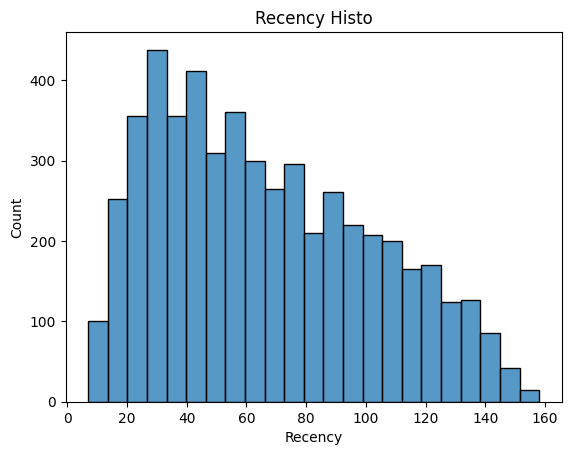

In [21]:
ax = sns.histplot(data=RFM_data['Recency'])
plt.title('Recency Histo')

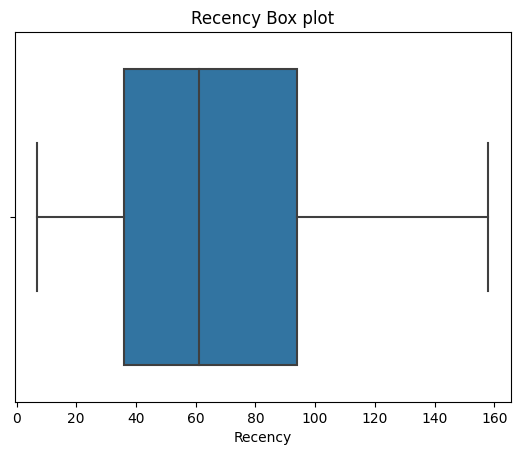

In [22]:
ax=sns.boxplot(data=temp_var, x= 'Recency')
plt.title('Recency Box plot')
plt.show()

             Recency  Frequency  Monetary
ID                                       
Jacob_633         33         37    294300
Steven_767        23         37    391300
Wayne_179         56         37    381300
Michael_443       54         37    364300
Robert_522        25         37    306300
...              ...        ...       ...
Jeffery_726      103          1      9900
Jeffrey_109       40          1      4900
Jeffrey_228       78          1       900
Rebecca_005       95          1       900
Joshua_052       128          1     49900

[5267 rows x 3 columns]


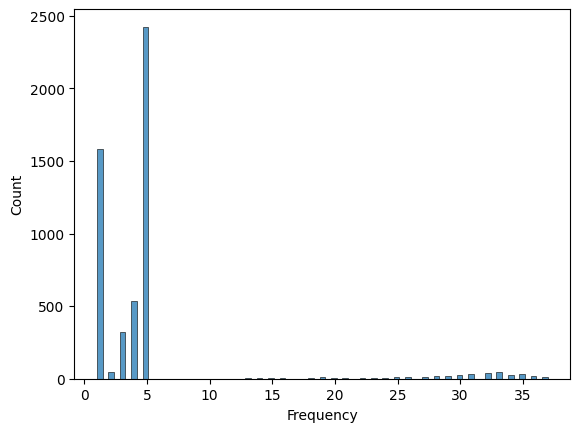

In [23]:
# 코드를 직접 작성해 보세요. 
# RFM_data의 Frequency열 값을 내림차순(높은값에서 낮은 값 순서로)으로 정렬
# [[YOUR CODE]]

temp_var = RFM_data.sort_values(by='Frequency', ascending=False)
print(temp_var)
ax = sns.histplot(data=RFM_data['Frequency'])

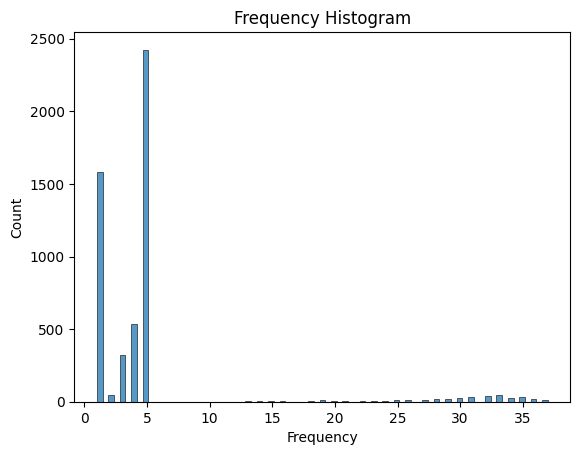

In [24]:
ax = sns.histplot(data = RFM_data['Frequency'])
plt.title('Frequency Histogram')
plt.show()

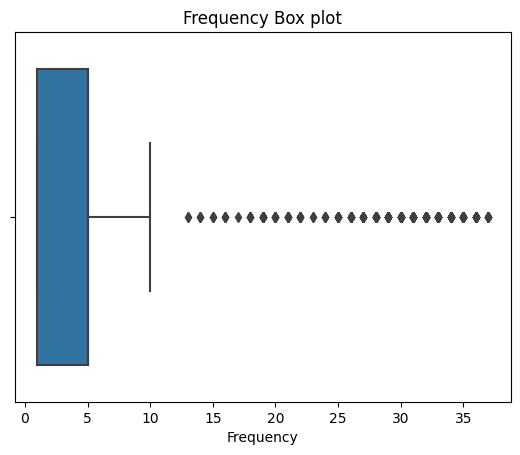

In [25]:
ax=sns.boxplot(data=temp_var, x='Frequency')
plt.title('Frequency Box plot')
plt.show()

             Recency  Frequency  Monetary
ID                                       
Nancy_098         26         33    582700
Linda_829        114         32    561800
Caleb_717         30         37    555300
Grace_792         87         35    551500
Sarah_679         71         33    486700
...              ...        ...       ...
Cory_496         129          1       900
Matthew_192      154          1       900
Angela_403        50          1       900
Cory_927          85          1       900
Teresa_908        55          1       900

[5267 rows x 3 columns]


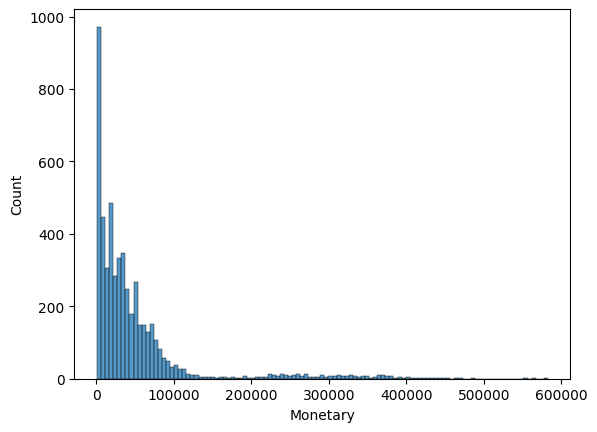

In [26]:
temp_var = RFM_data.sort_values(by='Monetary', ascending=False)
print(temp_var)
ax = sns.histplot(data=RFM_data['Monetary'])

In [27]:
# RFM_data의 R_score열을 만들고, Recency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)

# 만들어진 RFM_data의 Head 값을 확인합니다. 
RFM_data.head()


,Recency,Frequency,Monetary,R_score
ID,,,,
Aaron_027,60,5,40500,65.25
Aaron_031,102,5,17500,37.72
Aaron_077,40,4,26600,78.36
Aaron_165,21,4,49600,90.82
Aaron_224,108,1,900,33.78


In [28]:
# 코드를 직접 작성해 보세요.
# RFM_data의 F_score열을 만들고, Frequency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 

RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (1, 100)).round(2)

# 만들어진 RFM_data의 Head 값을 확인합니다. 
RFM_data.head()


,Recency,Frequency,Monetary,R_score,F_score
ID,,,,,
Aaron_027,60,5,40500,65.25,12.00
Aaron_031,102,5,17500,37.72,12.00
Aaron_077,40,4,26600,78.36,9.25
Aaron_165,21,4,49600,90.82,9.25
Aaron_224,108,1,900,33.78,1.00


In [29]:

# RFM_data의 M_score열을 만들고, Monetary열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
# [[YOUR CODE]]

RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (1, 100)).round(2)
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
ID,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74
Aaron_031,102,5,17500,37.72,12.00,3.82
Aaron_077,40,4,26600,78.36,9.25,5.37
Aaron_165,21,4,49600,90.82,9.25,9.29
Aaron_224,108,1,900,33.78,1.00,1.00


In [30]:
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
ID,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74
Aaron_031,102,5,17500,37.72,12.00,3.82
Aaron_077,40,4,26600,78.36,9.25,5.37
Aaron_165,21,4,49600,90.82,9.25,9.29
Aaron_224,108,1,900,33.78,1.00,1.00


In [31]:
# RFM_data에 RFM_score열을 만들고, 각 요소별 산술평균값을 할당
# 사용된 함수 round()는 결과 값의 소수 둘째자리까지 남겨두라는 의미입니다. 즉, 소수 셋째자리에서 반올림합니다. 
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)

In [32]:
# RFM_data에 Class열을 만들고, RFM_score와 지정한 분위값 범위에 따라 labels 값을 입력합니다

RFM_data["Class"] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])

In [33]:
RFM_data.head(
)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
ID,,,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74,28.33,4
Aaron_031,102,5,17500,37.72,12.00,3.82,17.85,5
Aaron_077,40,4,26600,78.36,9.25,5.37,30.99,3
Aaron_165,21,4,49600,90.82,9.25,9.29,36.45,2
Aaron_224,108,1,900,33.78,1.00,1.00,11.93,5


In [34]:
# Class가 입력된 RFM_data의 인덱스를 재정렬합니다.
RFM_data = RFM_data.reset_index()
RFM_data


,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,Aaron_027,60,5,40500,65.25,12.00,7.74,28.33,4
1,Aaron_031,102,5,17500,37.72,12.00,3.82,17.85,5
2,Aaron_077,40,4,26600,78.36,9.25,5.37,30.99,3
3,Aaron_165,21,4,49600,90.82,9.25,9.29,36.45,2
4,Aaron_224,108,1,900,33.78,1.00,1.00,11.93,5
...,...,...,...,...,...,...,...,...,...
5262,Zachary_937,101,4,11600,38.37,9.25,2.82,16.81,5
5263,Zachary_948,48,5,26500,73.12,12.00,5.36,30.16,4
5264,Zoe_163,11,5,105500,97.38,12.00,18.80,42.73,2
5265,Zoe_536,88,1,900,46.89,1.00,1.00,16.30,5


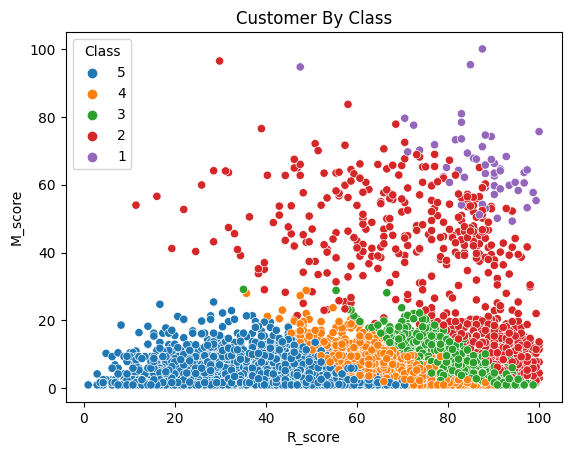

In [35]:
# R_score와 M_score를 기준으로 산포도(scatter) 그리기
sns.scatterplot(data=RFM_data, x='R_score', y='M_score', hue='Class')
plt.title('Customer By Class')
plt.show()

In [36]:
# RFM_data의 ID값을 Class열을 기준으로 집계
temp_var = RFM_data['ID'].groupby(RFM_data['Class']).count()
temp_var

Class
5    2109
4    1319
3    1049
2     737
1      53
Name: ID, dtype: int64

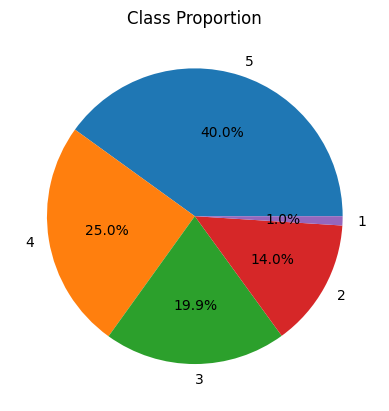

In [37]:
# 집계 결과(VIP 등급별 고객 수)에 따른 파이그래프 그리기
plt.pie(temp_var, labels=temp_var.index, autopct = '%1.1f%%')
# autopct 옵션에 '%1.1f%%'와 같은 형식 문자열을 전달하면, 각 범주의 비율이 소수점 아래 1자리까지 표시되며 백분율로 나타내어집니다. 
# 예를 들어, 범주 A의 비율이 25.5%일 경우 '25.5%'와 같이 표시됩니다.

plt.title('Class Proportion')
plt.show()

In [38]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = RFM_data.groupby('Class').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean'}).round(1)
temp_var

,Recency,Frequency,Monetary
Class,,,
5,101.7,2.7,23367.4
4,55.0,3.6,32101.2
3,34.3,4.3,40620.6
2,35.1,15.0,150000.1
1,27.2,33.9,384081.1


In [39]:
# 집계된 평균값 전치(Transpose)
temp_var.T

Class,5,4,3,2,1
Recency,101.7,55.0,34.3,35.1,27.2
Frequency,2.7,3.6,4.3,15.0,33.9
Monetary,23367.4,32101.2,40620.6,150000.1,384081.1


In [40]:
# 집계된 temp_var의 MultiIndex를 NormalIndex로 변환합니다. 
temp_var.index = temp_var.index.tolist()
temp_var.T

,5,4,3,2,1
Recency,101.7,55.0,34.3,35.1,27.2
Frequency,2.7,3.6,4.3,15.0,33.9
Monetary,23367.4,32101.2,40620.6,150000.1,384081.1


In [41]:
temp_var

,Recency,Frequency,Monetary
5,101.7,2.7,23367.4
4,55.0,3.6,32101.2
3,34.3,4.3,40620.6
2,35.1,15.0,150000.1
1,27.2,33.9,384081.1


In [42]:
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Class'})
temp_var


,Class,Recency,Frequency,Monetary
0,5,101.7,2.7,23367.4
1,4,55.0,3.6,32101.2
2,3,34.3,4.3,40620.6
3,2,35.1,15.0,150000.1
4,1,27.2,33.9,384081.1


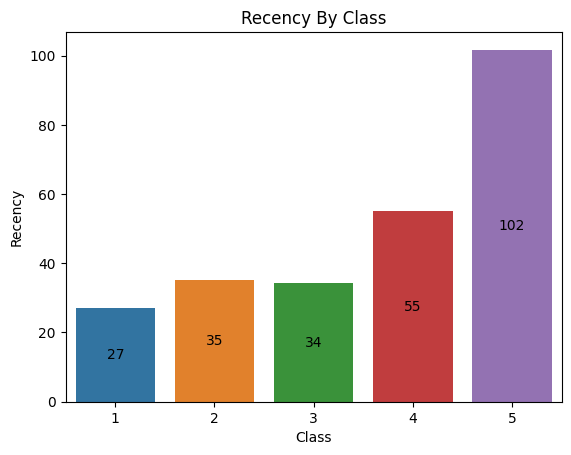

In [43]:
# 각 Class별 평균 Recency를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Recency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Recency By Class')
plt.show()

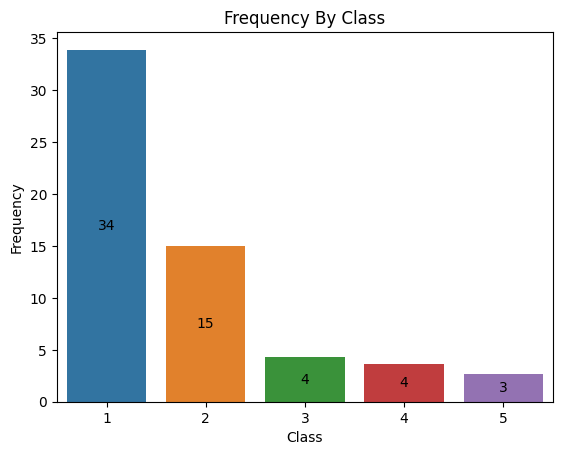

In [44]:
# 각 Class별 평균 Frequency를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Frequency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Frequency By Class')
plt.show()

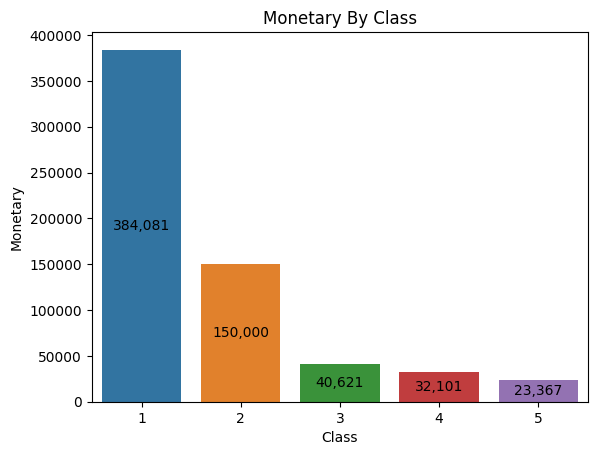

In [45]:
# 각 Class별 평균 Monetary를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Monetary')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Monetary By Class')
plt.show()

In [51]:
VIP_customer=RFM_data[RFM_data['Class']==1]
VIP_customer
VIP_customer.head()

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
180,Amanda_596,25,33,342700,88.20,89.00,59.16,78.79,1
290,Andrew_661,20,33,374700,91.48,89.00,64.61,81.70,1
355,Ann_400,22,32,345800,90.17,86.25,59.69,78.70,1
378,Anne_496,12,32,368800,96.72,86.25,63.60,82.19,1
493,Ashley_869,35,36,425400,81.64,97.25,73.23,84.04,1


In [57]:
VIP_customer2 = VIP_customer
VIP_customer2 = VIP_customer2.reset_index(drop=True)
VIP_customer2
VIP_customer2.head()

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,Amanda_596,25,33,342700,88.20,89.00,59.16,78.79,1
1,Andrew_661,20,33,374700,91.48,89.00,64.61,81.70,1
2,Ann_400,22,32,345800,90.17,86.25,59.69,78.70,1
3,Anne_496,12,32,368800,96.72,86.25,63.60,82.19,1
4,Ashley_869,35,36,425400,81.64,97.25,73.23,84.04,1


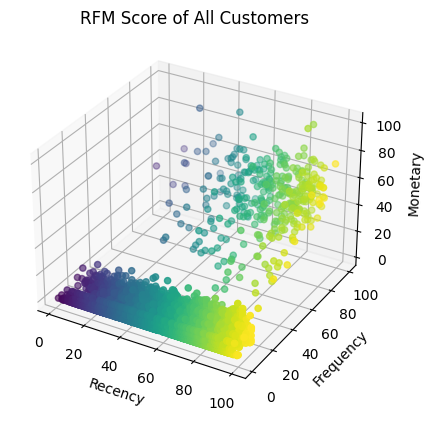

In [58]:
# 필요한 라이브러리를 호출합니다. 
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다. 
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다. 
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. . 
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다. 
# 이때 색깔은 x축을 기준으로 합니다. 
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()